In [1]:
!conda env create -f ./connectome-harmonics/tutorial_environment.yml

Solving environment: \ 

In [17]:
!conda init bash
# !conda activate cmp3-tutorial

no change     /srv/conda/condabin/conda
no change     /srv/conda/bin/conda
no change     /srv/conda/bin/conda-env
no change     /srv/conda/bin/activate
no change     /srv/conda/bin/deactivate
no change     /srv/conda/etc/profile.d/conda.sh
no change     /srv/conda/etc/fish/conf.d/conda.fish
no change     /srv/conda/shell/condabin/Conda.psm1
no change     /srv/conda/shell/condabin/conda-hook.ps1
no change     /srv/conda/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /srv/conda/etc/profile.d/conda.csh
no change     /home/jovyan/.bashrc
No action taken.


In [19]:
!pip install networkx
!pip install pygsp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:0000:0100:01


In [1]:
import scipy.io
import pandas as pd
data = scipy.io.loadmat("shared/harmonics/nhw2022-network-harmonics-data.mat")

# General
import os
import sys
import subprocess
import copy

# Dataset management
import datalad.api as dl

# Data handling
import pandas as pd
import numpy as np
import nibabel as nib
import scipy.io as sio

# BIDS dataset handling
# from bids import BIDSLayout

# Network / Graph
import pygsp
import networkx as nx

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import nilearn
from nilearn import plotting, image, datasets

In [2]:
import scipy.io
data = scipy.io.loadmat("./shared/harmonics/nhw2022-network-harmonics-data.mat")

In [3]:
key_list = list(data.keys())
key_list

['__header__',
 '__version__',
 '__globals__',
 'age',
 'nets',
 'None',
 'yeoLabs',
 '__function_workspace__']

In [56]:
# data['age']
data['age'][505]

array([74], dtype=uint8)

In [21]:
data['nets'][:,:,593]


array([[0.        , 0.02119   , 0.0038852 , ..., 0.0017869 , 0.        ,
        0.0013556 ],
       [0.02119   , 0.        , 0.0033969 , ..., 0.00067029, 0.        ,
        0.        ],
       [0.0038852 , 0.0033969 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0017869 , 0.00067029, 0.        , ..., 0.        , 0.031514  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.031514  , 0.        ,
        0.016279  ],
       [0.0013556 , 0.        , 0.        , ..., 0.        , 0.016279  ,
        0.        ]])

In [25]:
data['nets'][:,:,593].shape

(376, 376)

<AxesSubplot:>

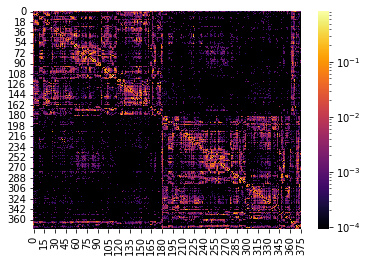

In [45]:
# Create color map to handle zeros with log visualization
custom_cmap = copy.copy(plt.cm.get_cmap("inferno"))
# Copy the default cmap (0,0,0.5156)
custom_cmap.set_bad((0, 0, 0))
sns.heatmap(data['nets'][:,:,505], cmap = custom_cmap, norm=LogNorm())


# sns.color_palette("viridis", as_cmap=True)
# heatmap = sns.heatmap(data['nets'][:,:,0], norm=LogNorm())
# heatmap.set(axis_bgcolor='k')



In [57]:
subject_1 = data['nets'][:,:,0]

print(subject_1.shape)
print(type(subject_1))

np.fill_diagonal(subject_1, 0)  # PyGSP does not support self-loops

print(subject_1.shape)
print(type(subject_1))

G_fd = pygsp.graphs.Graph(subject_1)  # PyGSP graph
G_fd.compute_laplacian(lap_type="normalized")
G_fd.compute_fourier_basis()  # compute connectome harmonics


(376, 376)
<class 'numpy.ndarray'>
(376, 376)
<class 'numpy.ndarray'>


In [58]:
G_fd.is_connected()

True

In [59]:
G_fd.U

array([[ 7.86106654e-02, -5.83557914e-02,  1.95570898e-02, ...,
         8.66757717e-04, -2.29972696e-04,  7.63508127e-05],
       [ 5.30720779e-02, -4.29968793e-02, -8.25203843e-02, ...,
         1.43266974e-04,  1.07953450e-02,  5.71098295e-05],
       [ 5.57628321e-02, -7.13533243e-02, -6.36574469e-02, ...,
         1.08653061e-04, -2.59549500e-02,  1.00471370e-04],
       ...,
       [ 6.66241447e-02,  8.44073427e-02, -6.22113256e-02, ...,
        -4.78529969e-01, -8.25655745e-04, -1.70625740e-02],
       [ 3.66805173e-02,  4.24168436e-02, -1.01802153e-02, ...,
        -3.43239102e-02,  4.12385163e-05,  1.66579517e-02],
       [ 4.46701043e-02,  2.83777006e-02,  4.79850562e-02, ...,
         2.69272594e-04,  9.88246683e-05, -1.38471602e-03]])

<AxesSubplot:>

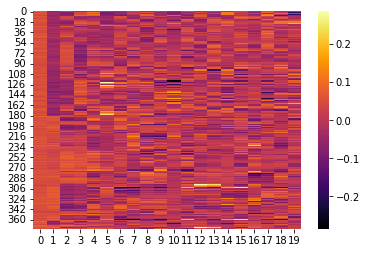

In [60]:
# Create color map to handle zeros with log visualization
custom_cmap = copy.copy(plt.cm.get_cmap("inferno"))
# Copy the default cmap (0,0,0.5156)
custom_cmap.set_bad((0, 0, 0))
# sns.heatmap(G_fd.U, cmap = custom_cmap, norm=LogNorm())
# sns.heatmap(G_fd.U, cmap = custom_cmap)
sns.heatmap(G_fd.U[:,:20], cmap = custom_cmap)

In [10]:
import PyOpenGL
import pyqtgraph
import PyQt5
import PySide


ModuleNotFoundError: No module named 'PyOpenGL'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


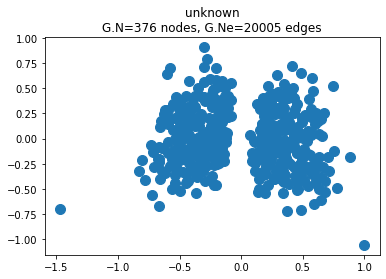

In [13]:
from pygsp import graphs, plotting
G_fd.set_coordinates()  # spring form plotting
G_fd.plot() 


In [ ]:
G_fd.plot_spectrogram()

In [12]:
# !pip install pyqtgraph
# !pip install PyQt5
# !pip install PySide
# !pip install PyOpenGL